In [15]:
import numpy as np
import matplotlib.pyplot as plt

fname = "furby_7299"

NSAMPLES = 16000
NCHANS = 4096
HDR_SIZE = 16384
DTYPE = np.float32

o = open(fname, "rb")
hdr = o.read(HDR_SIZE)

data = np.fromfile(o, dtype=DTYPE).reshape(NSAMPLES, NCHANS).T
a = np.array([[7,1,3,9],[1,2,3,4]])*10/7
a

array([[10.        ,  1.42857143,  4.28571429, 12.85714286],
       [ 1.42857143,  2.85714286,  4.28571429,  5.71428571]])

In [16]:
import random
import json
category = open("/mnt/buf0/furbies_for_helen/furbies_run_1/furbies.cat", "rb")
#skipping header
for i in range(4):
    category.readline()
id_set = []
for i in range(400):
    fid = category.readline()[0:4]
    id_set.append(fid.decode("utf-8"))
selected_frbs = random.sample(id_set, 119)
print(selected_frbs)
with open("TOP_SECRET.txt","w") as f:
    json.dump(selected_frbs, f)

['6952', '1360', '7994', '6155', '7675', '7687', '5763', '6780', '0933', '4959', '7415', '7804', '5814', '9732', '9462', '7698', '5830', '4471', '3315', '9420', '4377', '2438', '4254', '5066', '9387', '9361', '4067', '1614', '9274', '1848', '8204', '7791', '1861', '7287', '1202', '6137', '4144', '0953', '7651', '5639', '6792', '4453', '4438', '6246', '0342', '9929', '1506', '4841', '4848', '1697', '9455', '5474', '3442', '7621', '0297', '0366', '9856', '7898', '3584', '2355', '5386', '3943', '0145', '6245', '1233', '6075', '5129', '6738', '8595', '0565', '9888', '4767', '1288', '4349', '5616', '9218', '8187', '7441', '8643', '9452', '6986', '6568', '0393', '7448', '2912', '6150', '1243', '1136', '6547', '6060', '9410', '6395', '4863', '3112', '5842', '6338', '9482', '9444', '3697', '7771', '3835', '4230', '5292', '0141', '3811', '8716', '3145', '6235', '6237', '1723', '9807', '0712', '9612', '6370', '4291', '4707', '8732', '3737', '5287']


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from blimpy import Waterfall
fb = Waterfall('ics_a.fil', max_load=10)
plotf, plotdata = fb.grab_data()
plotdata=plotdata.transpose()
noisedata = plotdata[:, 0:16000]

blimpy.io.base_reader WARNING  Setting data limit != 1GB, please handle with care!


In [13]:
print(plotdata[0])
plotdata[0]+np.random.uniform(-0.5,0.5,plotdata[0].shape)

[137 133 138 ... 127 127 127]


array([136.63638977, 132.59934231, 137.62462558, ..., 126.66966237,
       127.19320438, 126.54458767])

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from blimpy import Waterfall

NSAMPLES = 16000
NCHANS = 4096
HDR_SIZE = 16384
DTYPE = np.float32

frbs=[]
def inject(noise, frbs, nsample, interval):
    for i in range(len(frbs)):
        #print(i)
        fname = "/mnt/buf0/furbies_for_helen/furbies_run_1/furby_"+frbs[i]
        o = open(fname, "rb")
        hdr = o.read(HDR_SIZE)
        data = np.fromfile(o, dtype=DTYPE).reshape(NSAMPLES, NCHANS).T*10/7
        data = data+np.random.uniform(-0.5,0.5,data.shape)
        start = i*interval
        noise_seg = noise[:,start:start+nsample]
        #scaling
        new_data = np.add(noise_seg, data)
        #handling overflow and casting the final data after adding
        new_data[new_data>255] = 255
        noise[:,start:start+nsample] = new_data.round().astype(np.uint8)
    return noise
interval = int(10/(480*1e-6))
inj = inject(plotdata, selected_frbs, NSAMPLES, interval)

KeyboardInterrupt: 

In [ ]:
from blimpy import Waterfall
fb = Waterfall('ics_a.fil', max_load=10)
plotf, plotdata = fb.grab_data()
plotdata=plotdata.transpose()
noisedata = plotdata[:, 0:16000]

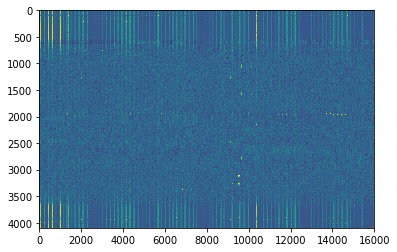

In [12]:
plt.imshow(noisedata, interpolation = 'nearest', aspect = 'auto')
plt.show()
frbs = []
frbs.append(data)

In [ ]:
def inject(noise, frbs, nsample, interval):
    for i in range(len(frbs)):
        start = i*interval
        noise_seg = noise[:,start:start+nsample]
        #scaling
        new_data = np.add(noise_seg, frbs[i])
        #handling overflow and casting the final data after adding
        new_data[new_data>255] = 255
        noise[:,start:start+nsample] = new_data.astype(np.uint8)
    return noise
inj = inject(noisedata, frbs, NSAMPLES, 20000)

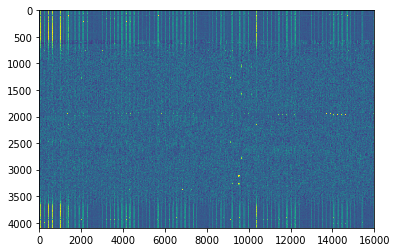

In [16]:
plt.imshow(inj, interpolation = 'nearest', aspect = 'auto')

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        3.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.000000e+00, 0.000000e+00, 0.000000e+00,
        8.000000e+00, 0.000000e+00, 0.000000e+00, 4.000000e+00,
        0.000000e+00, 1.400000e+01, 0.000000e+00, 0.000000e+00,
        1.900000e+01, 0.000000e+00, 0.000000e+00, 4.100000e+01,
        0.000000e+00, 5.000000e+01, 0.000000e+00, 0.000000e+00,
        8.500000e+01, 0.000000e+00, 0.000000e+00, 1.350000e+02,
        0.000000e+00, 2.090000e+02, 0.000000e+00, 0.000000e+00,
        3.260000e+02, 0.000000e+00, 0.000000e+00, 4.850000e+02,
        0.000000e+00, 7.400000e+02, 0.00

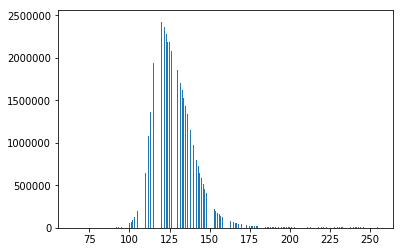

In [22]:
plt.hist(inj.flatten(),bins=512)

In [26]:
np.std(inj)

14.087584683346815

In [27]:
np.std(noisedata)

14.087584683346815

In [8]:
plotdata[0].shape
2494464/16000
10/(480*1e-6)*119

2479166.666666667

In [2]:
import numpy as np
stds = [np.std(x) for x in plotdata]

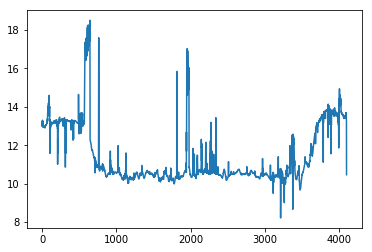

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.arange(4096), stds)